In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import and filter data

In [72]:
youtube = pd.read_csv("youtube-data/USvideos.csv")
delete = []
for (comments, ratings, index) in zip(youtube.comments_disabled, youtube.ratings_disabled, youtube.index):
    if comments or ratings:
        delete.append(index)
youtube = youtube.drop(delete)

## Create label and training sets

In [149]:
y = np.array(youtube.views).transpose()
x = np.array(youtube[['likes', 'dislikes', 'comment_count']])

## Allocate 80% as training data and 20% as test data

In [150]:
y_train = y[:int(len(y)*0.8)]
y_test = y[len(y_train):]
x_train = x[:int(len(x)*0.8)]
x_test = x[len(x_train):]

## Train and evaluate model

In [171]:
from sklearn.linear_model import LinearRegression
# y = 1 * x_0 + 2 * x_1 + 3
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_test, y_test)

0.7808261931710568

## Generate predictions

In [196]:
pred = reg.predict(x_test)

## Plot results

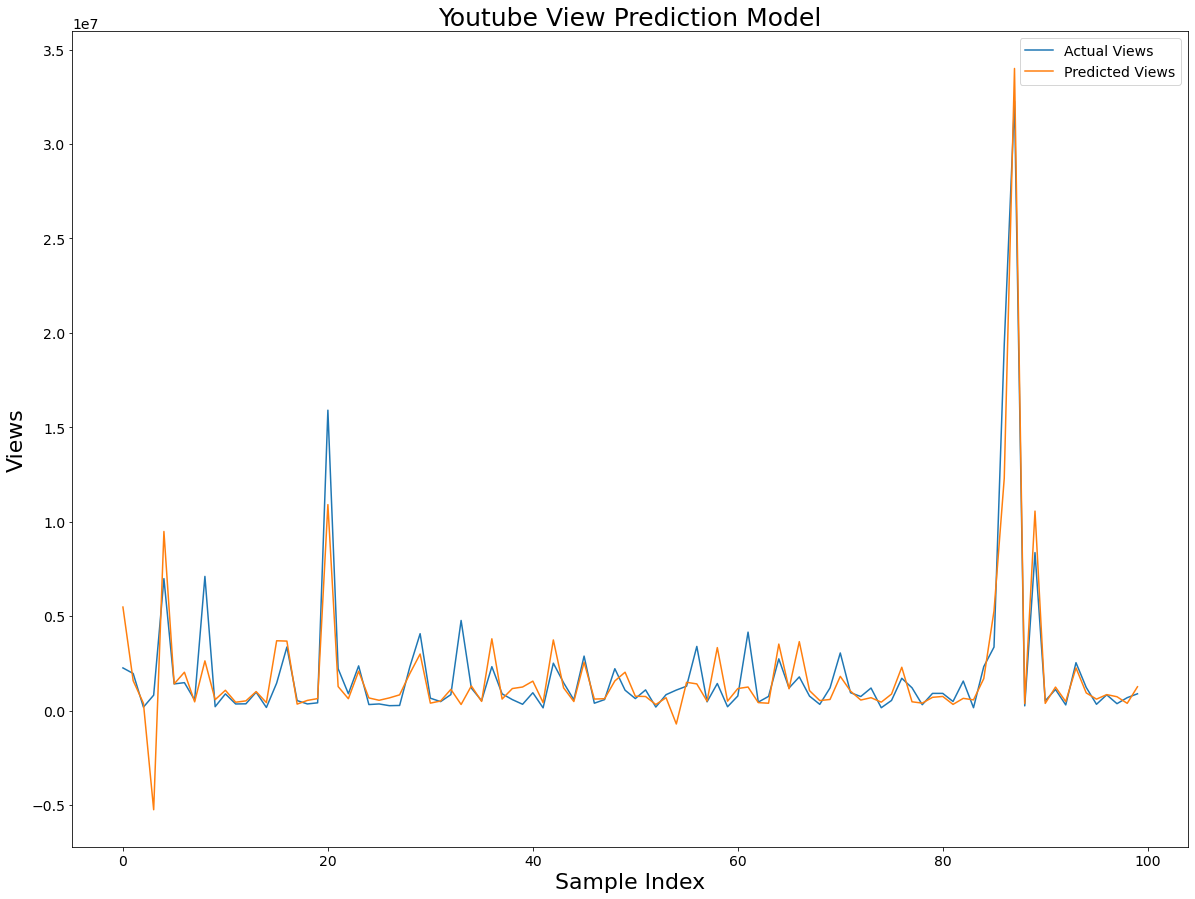

In [232]:
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', labelsize=22)    # fontsize of the x and y labels
plt.rc('figure', titlesize=25)  # fontsize of the figure title
plt.figure(figsize=(20,15))
plt.plot(range(0,100), y_test[:100])
plt.plot(range(0, 100), pred[:100])
plt.title("Youtube View Prediction Model", fontsize=25)
plt.xlabel("Sample Index")
plt.ylabel("Views")
plt.legend(["Actual Views", "Predicted Views"])
plt.show()